## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# NORTHWESTERN COUNTY REAL ESTATE PROJECT

# Business Understanding.

# 1.1 Overview

As a major sector of the economy, the real estate market is highly dependent on several factors to achieve success, mainly precise house price forecasts. A real estate agency in King County, Washington state is looking for help in determining the primary factors that affect property values within the region. This project uses data from the King County House Sales dataset, which contains past real estate sales data that includes information on a variety of properties such as the previous sale price, the grade of the home and the year of construction. Some of the challenges that affect the real estate market are economic downturns like decrease in demand of property or increase in housing prices causing challenges of affordability and insufficient data that makes it difficult to make a recommendation system. A solution would be to create a combination of several multiple linear regression models in order to identify trends in the data. The project's objective is to create a thorough advice system for the agency that will help homeowners understand how house renovations may affect the estimated worth of their properties. 

# 1.2 Stakeholders

The stakeholders in this analysis are: the real estate agency, real estate developers, potential investors, potential customers and home owners

# 1.3 Business Problem

A real estate agency from King County tasked us to analyze how different features affect prices of homes since as stakeholders, they don't have a reliable system that offers data driven insights and predictions to these home prices. Based on the particular characteristics of the homeowner's property, we will use data analytics and predictive modeling through simple and multiple linear regression approaches to; help homeowners accurately assess the value of their own houses, investors find potentially discounted properties, and real estate agents will be able to counsel their customers on pricing approaches by predicting home prices with ease.

# 1.4 Objectives

The key objectives for this analysis are as follows;
1.	Predicting home prices: To create a predictive model that estimates increase in market value of home based on renovation factors.

2.	Identifying the most important features: To review which renovation variables have the highest impact on increasing estimated value of a home.
- How much is the likely increase in the sale price by adding an additional floor?
- How much is the likely increase in the sale price by adding an extension to the living space in the home?
- How much is the likely increase in the sale price by adding an additional bedroom?

3.	Monitoring real estate market trends: To learn more about the regions with the highest and lowest average sale price as well as the most in-demand property types.



# DATA UNDERSTANDING

The research retrieves information from King County House Sales dataset which contains the kc_house_data.csv file used to forecast the sales price of homes in King County.

`Description`: It comprises of 21,597 housing observations and 20 house features along with a column indicating the home id. The data covers homes sold between May 2014 and May 2015

The columns in the dataset are:

Numerical Columns (15)

- date - Date house was sold

- price - Sale price (prediction target)

- bedrooms - Number of bedrooms

- bathrooms - Number of bathrooms

- sqft_living - Square footage of living space in the home

- sqft_lot - Square footage of the lot

- floors - Number of floors (levels) in house

- sqft_above - Square footage of house apart from basement

- sqft_basement - Square footage of the basement

- yr_built - Year when house was built

- yr_renovated - Year when house was renovated

- lat - Latitude coordinate

- long - Longitude coordinate

- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Categorical Columns (6)
- id - Unique ID for each home sold

- waterfront - Whether the house has a view to a waterfront

- view - how good the view of the property was

- condition - the condition of the house

- grade - overall grade of the house. Related to the construction and design of the house 

- zipcode - What zip code area the house is in


`Key variables:`
price, bedrooms, sqft living, floors


`Target Variable`: The `"price"` of the properties is the project's target variable. This indicates that other independent variables, such as the attributes of the property (square footage, number of bedrooms, location, etc.), are what predict or explain the outcome or goal variable. The price of a property will be the variable being modeled or projected in statistical modeling and analysis based on the values of other variables.

These variables will be used to answer the data questions and derive actionable insights to the real estate agency on how to make predictions on price based on features affecting sales


## Load data

### Library Imports
Begin with importing all the neccessary libraries and packages that will be useful during this project

In [2]:
# First we import packages to be used.
import markdown
import pandas as pd
import numpy as np
import csv
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import KFold
import scipy.stats as stats
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer



### Data cleaning
Functions are used to promotes modularity, reusability, abstraction, encapsulation and readability, all of which contribute to writing cleaner, more maintainable, and efficient codes. 
>We created a function that: 
>1. loads the data from the CSV file.
>2. Converts the date feature from object datatype to datetime format.  
>3. Splits the grade column into two columns to create two features: grade_ and grade_comments.

**N/B:** The split functions splits the grade feature to form two features one interger datatype and the other string datatype which gives comment on the grade.

In [3]:
def load_data(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Convert 'date' column to datetime format
    data["date"] = pd.to_datetime(data['date'])
    
    # Split 'grade' column into 'grade_' and 'grade_comment'
    data[["grade_", "grade_comment"]] = (
        data["grade"].str.split(" ", n=1, expand=True)
    )

    return data

In [4]:
df = load_data("data/kc_house_data.csv")

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_,grade_comment
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7,Average
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7,Average
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6,Low Average
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7,Average
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8,Good


From the data loaded we can see the grade feature split to two features .This will be useful when performing statistical tests later on during our analysis,where we require numerical data compaired to categorical data. Also,the sqft_living, sqft_lot, sqft_above, sqft_living15, and sqft_lot15 columns represent continuous variables while the bedrooms, bathrooms, and floors columns have integer values.

We then use the pandas method $ df.info() $ to  retrieve concise information about the DataFrame, such as the number of non-null values in each column, the data type of each column, and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

Notice that ,the datatype for the date feature is in date time format.Converting dates to datetime format enhances the consistency, flexibility, and functionality of your data, making it easier to work with and analyze.

From the information above we are able to identify the numerical data. Select the numerical data and use the $.describe()$  method to  quickly understanding the distribution and summary statistics of numerical data in your DataFrame, which can be helpful during data exploration and analysis.


In [7]:
df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1986.620318,12758.283512
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,685.230472,27274.441950
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,399.000000,651.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,6210.000000,871200.000000


From simply looking at this out come you can come up with a few observations:
* Some columns, like bedrooms and bathrooms, have a maximum value that seems unusually high compared to the other values in the dataset, suggesting potential **outliers**

These observations provide insights into the nature of the numerical variables in the dataset and can guide further analysis, such as identifying and handling outliers, understanding the relationships between variables, and selecting appropriate modeling techniques. 

To visualize the outliers we use boxplots. Below is a function boxplot_outliers() which is designed to visualize potential outliers in a DataFrame using box plots.The function is defined with two parameters: df (the DataFrame containing the data) and cols (a list of column names to visualize).

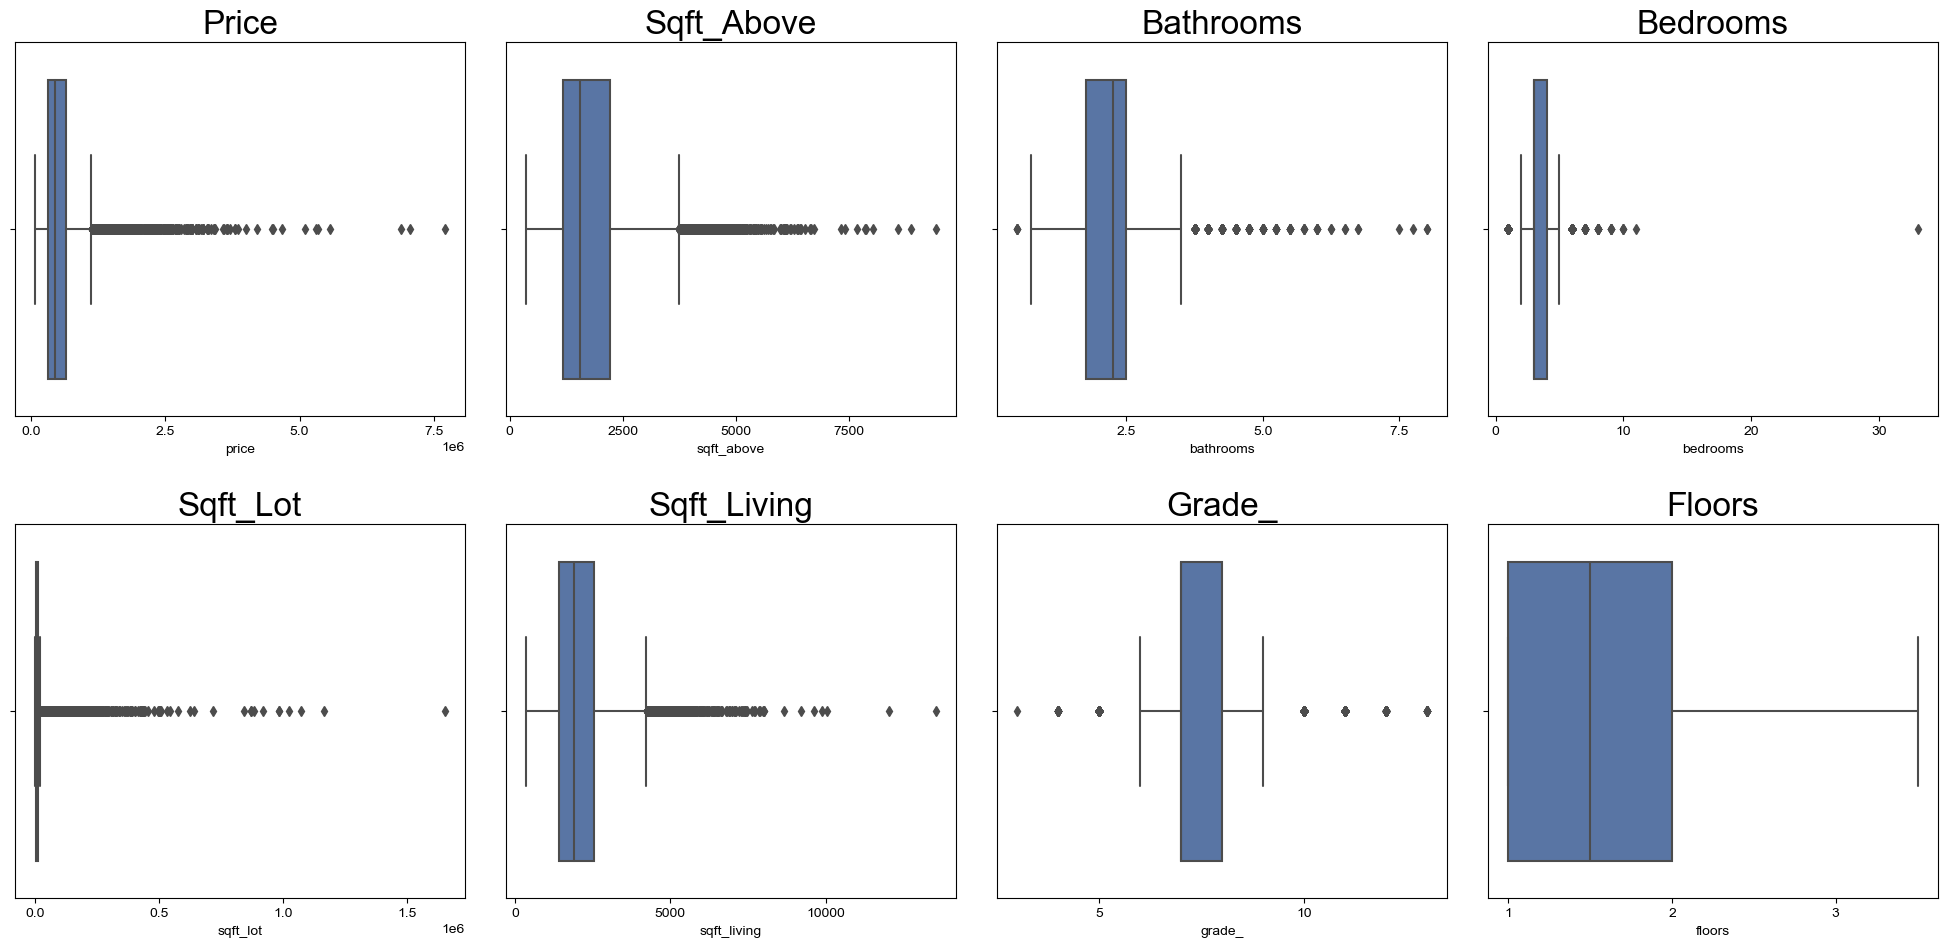

In [8]:
# function to visualize outliers 

def boxplot_outliers(df, cols):
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    axes = axes.ravel()
    sns.set(font_scale=2.0)
    for i, col in enumerate(cols):

        # convert the x-axis variable to a numeric data type
        
        df[col] = df[col].astype(float)
        sns.boxplot(x=df[col], ax=axes[i])
        
        axes[i].set_title(col.title())
    plt.tight_layout()

# specify the columns to plot

cols = ['price', 'sqft_above', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_living', 'grade_', 'floors']

# call the plot_boxplots function

boxplot_outliers(df, cols)

Removing outliers from a dataset is a decision that depends on the context of your analysis and the specific goals of your project.It is imporntant to remove outliers in order to: preserving data integrity,improving model performance and enhancing interpretability of data. This function remove_outliers is designed to remove outliers from a given column in a DataFrame using the Z-score method. It is defined with two parameters: column (the column containing the data) and x (the threshold value for removing outliers).
>The selection of different z-score thresholds for each variable reflects considerations of the data's characteristics and analytical requirements. A z-score threshold of 4 is applied to price and bathrooms, as these variables may exhibit extreme values due to the nature of the data, such as high-end properties or properties with numerous bathrooms. Sqft_above and sqft_lot, representing physical property attributes, use a z-score threshold of 3 to capture outliers within a reasonable range without being overly aggressive. Bedrooms, being a discrete variable with a smaller range, employ a z-score threshold of 2 to detect moderately deviating outliers. These varying thresholds balance the detection of outliers with data integrity preservation, ensuring an effective approach tailored to each variable's variability and expected value range.

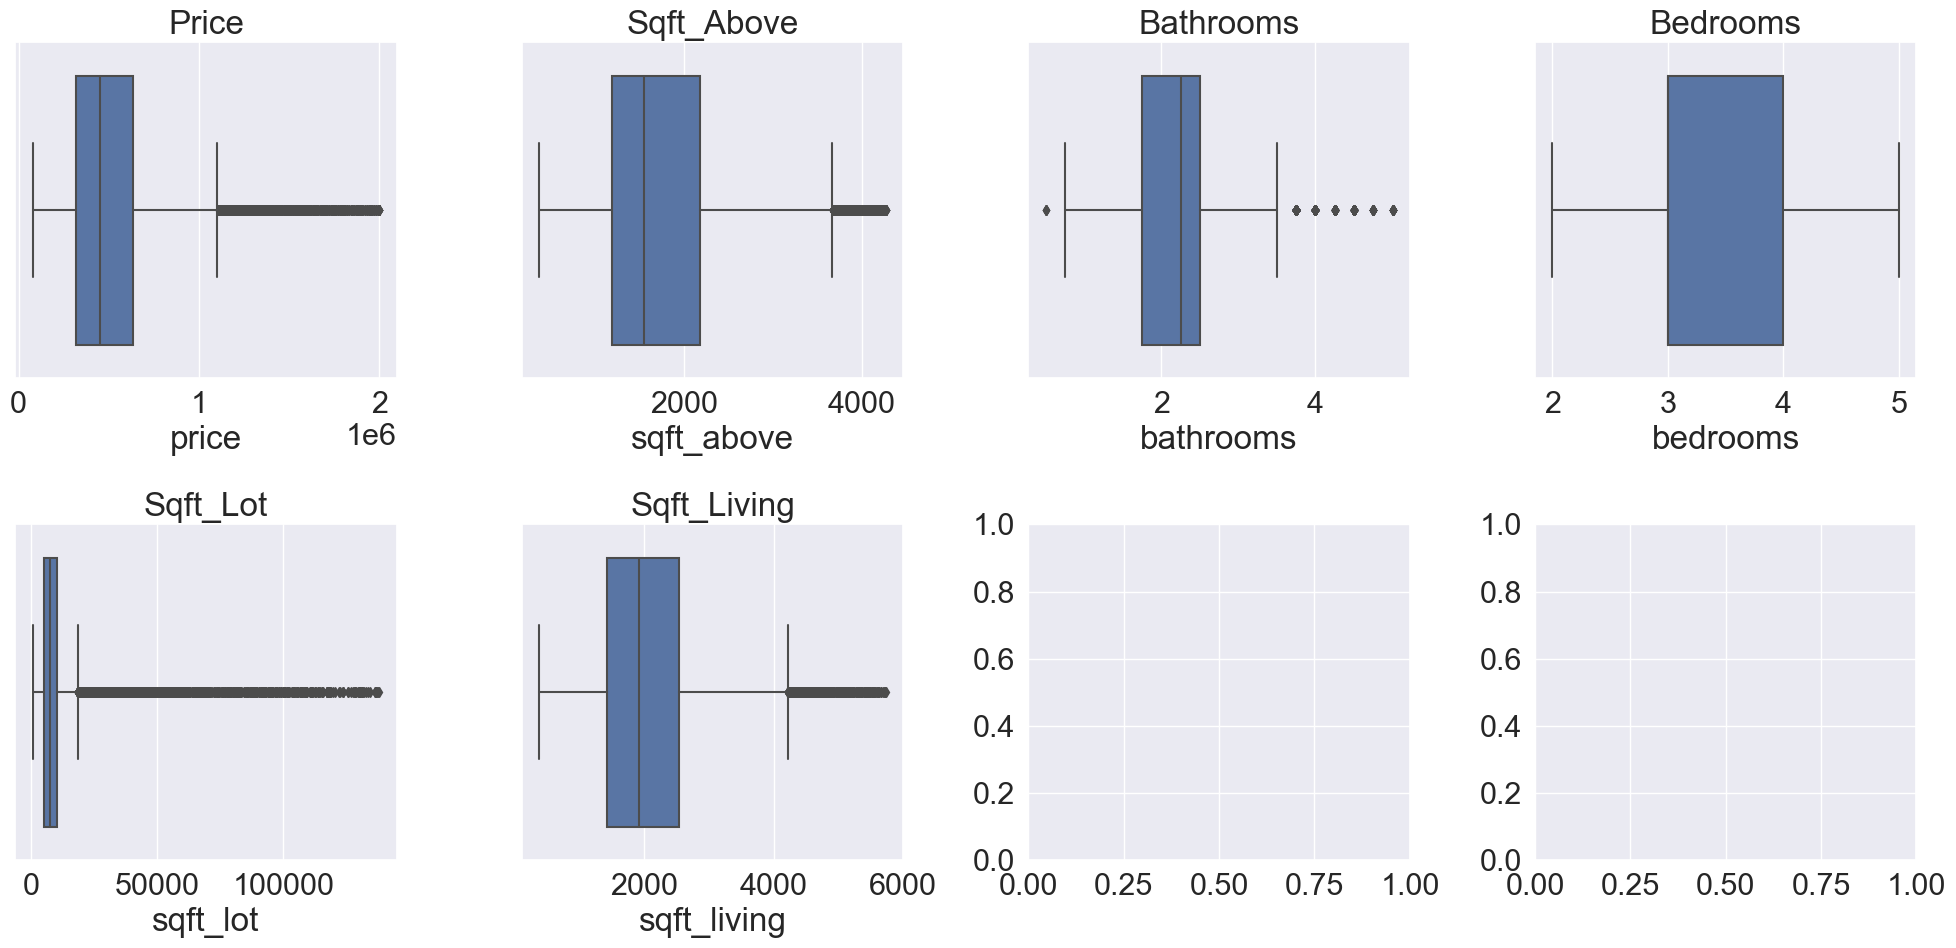

In [9]:
# function to remove outliers

def remove_outliers(column,x):
    new_column = column[(np.abs(stats.zscore(column))<x)]
    return new_column
# remove outliers for price
price = remove_outliers(df.price, 4)

# remove outliers for sqft_above
sqft_above_ground = remove_outliers(df.sqft_above, 3)

# remove outliers for bathrooms
bathrooms = remove_outliers(df.bathrooms, 4)

# remove outliers for bedrooms
bedrooms = remove_outliers(df.bedrooms, 2)

# remove outliers for sqft_lot

sqft_lot = remove_outliers(df.sqft_lot, 3)

# remove outliers for sqft_living
sqft_living = remove_outliers(df.sqft_living, 4)
gradee = remove_outliers(df.grade_, 1.5)

# combine all columns into a single dataframe
columns = pd.concat([price, sqft_above_ground, bathrooms, bedrooms, sqft_lot, sqft_living, gradee], axis=1)
# cols = [price, sqft_above_ground, bathrooms, bedrooms, sqft_lot, sqft_living, grade_]
# plot box plots for all columns
boxplot_outliers(columns,columns.columns[:6])


We then check for missing values in our dataset.This is done usin the  .𝑖𝑠𝑛𝑎()
  pandas method which returns a DataFrame of the same shape as the original DataFrame, where each element is True if the corresponding element in the original DataFrame is NaN, and False if otherwise.This is done to ensure data inegrity , Model Performance as many machine learning algorithms cannot handle missing values, data quality, bias reduction and for better data interpretability.

In [10]:
#checking for missing values

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
grade_              0
grade_comment       0
dtype: int64

In [11]:
# Visualize missing values with missingno library
plt.figure(figsize=(10, 5))
msno.bar(df, color='skyblue', figsize=(10, 5), fontsize=8)
plt.title('Missing Values Within Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Percentage of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

NameError: name 'msno' is not defined

<Figure size 1000x500 with 0 Axes>

It  is evident that three features have null values i.e waterfront,view and  yr_renovated. When considerinf if we should drop or replace the null values we look at **impact on Analysis** and **amount of missing Data**. If only a small percentage of values are missing, imputation methods like mean, median, or mode can be suitable but if a large portion of the data is missing, dropping the column or row may be more appropriate to avoid biasing the analysis.

In [ ]:
# Checking for duplicates
df.duplicated().value_counts()

In [ ]:
df.shape

In [ ]:
#Categoricals
#waterfront and view also have nulls
#grade and condition dont
df['grade'].value_counts()
print(df['grade'].unique())

In [ ]:
#cheking the Waterfront variable
df['waterfront'].value_counts()

In [ ]:
# replacing the null values in waterfront with UNVERIFIED
df['waterfront'] = df['waterfront'].fillna('UNVERIFIED')

In [ ]:
#  confirming null values in waterfront
df.isna().sum()

In [ ]:
#checking the view variable
df['view'].value_counts()

In [ ]:
#dropping the nulls in view column 
# df['view'].dropna(inplace=True)
df.dropna(subset = ["view"], inplace=True)


In [ ]:
df.isna().sum()

In [ ]:
#dropping the nulls in yr-renovated column 
df.dropna(subset = ["yr_renovated"], inplace=True)

In [ ]:
# confirming for nulls
df.isna().sum()

In [ ]:
df['condition'].value_counts()

In [ ]:
df['sqft_basement'].value_counts()

In [ ]:
#The sqft_basement has ? as a variable making it an object, fixing that;
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0 # convert ? to 0
df.sqft_basement = df.sqft_basement.astype(np.float64) # change from string
df['sqft_basement']

In [ ]:
# confirming there's no ?
df['sqft_basement'].value_counts()

In [ ]:
df.columns

In [ ]:
df.info()

## Exploratory Data Analysis

In [ ]:
#Check numnber of rows and columns 
df.shape

In [ ]:
df.describe()

In [ ]:
# Set figure size
plt.figure(figsize=(10, 5))

# Create histogram with Seaborn
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')

# Plot vertical line representing mean price
plt.axvline(df['price'].mean(), color='black', linestyle='dashed', linewidth=2)

# Annotate mean price on the plot
plt.text(df['price'].mean() * 1.1, plt.ylim()[1] * 0.5, 'Mean: ${:,.0f}'.format(df['price'].mean()), fontsize=12)

# Format xticks by including $ sign, adding commas, and removing decimals
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

# Rotate x-ticks 
plt.xticks(rotation=30)

# Set labels and title
plt.xlabel('Price', fontweight="bold", fontsize=18, labelpad=15)
plt.ylabel('Count', fontweight="bold", fontsize=18, labelpad=15)
plt.title('Distribution of Single-Family Home Prices in Kings County', fontweight="bold", fontsize=18, pad=15)

# Show plot
plt.show()


In [ ]:
print("The skewness of the price column", df['price'].skew())
print("The kurtosis of the price column", df['price'].kurt())

The density plot illustrates that the price distribution differs from a normal curve, indicating significant positive skewness. This suggests that a majority of houses were sold below the average price, resulting in a lengthy tail towards higher prices. Moreover, the plot displays a leptokurtic kurtosis|, signifying an abundance of outliers with elongated tails.

### mode


To gain a better understanding of the characteristics of homes in the area, we used the mode function to compare the number of bathrooms, bedrooms, and floors in the dataset. By identifying the most common values for these features, we aimed to provide insights into the typical configuration of homes in the area.

In [ ]:
def get_mode(data, column):
    """Calculate the mode of a column in the dataset."""
    return data[column].mode()

# Calculate the mode for bathrooms
bathrooms_mode = get_mode(df, 'bathrooms')
print("Mode of bathrooms:", bathrooms_mode)

# Calculate the mode for bedrooms
bedrooms_mode = get_mode(df, 'bedrooms')
print("Mode of bedrooms:", bedrooms_mode)

# Calculate the mode for floors
floors_mode = get_mode(df, 'floors')
print("Mode of floors:", floors_mode)



To visually represent the findings of the mode calculations for bathrooms, bedrooms, and floors, we
created a bar chart. Each bar in the chart corresponds to the mode value for each feature. This visualization provides a clear comparison of the most common configurations of these features in the dataset.

In [ ]:
# Create a bar chart to visualize the modes
plt.figure(figsize=(8, 6))
plt.bar(['Bathrooms', 'Bedrooms', 'Floors'], [bathrooms_mode[0], bedrooms_mode[0], floors_mode[0]], color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Features', fontweight="bold", fontsize=18, labelpad=15)
plt.ylabel('Mode', fontweight="bold", fontsize=18, labelpad=15)
plt.title('Most Common Features in Homes', fontweight="bold", fontsize=18, pad=15)
plt.show()

The analysis reveals that the majority of homes in the dataset have at least 3 bedrooms, 2 bathrooms, and 1 floor.

### Correlation

In [ ]:
def get_correlation_df(df):
    corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
    corr_df.set_index(['pairs'], inplace=True)
    corr_df.drop(columns=['level_1', 'level_0'], inplace=True)
    corr_df.columns = ['cc']
    corr_df = corr_df.drop_duplicates()
    return corr_df.head(50)


In [ ]:
# Check for variables with correlation >= 0.75
high_corr = df.corr > 0.75

# Print variables with high correlation
print("Variables with correlation >= 0.75:")
print(high_corr[high_corr == True].stack().reset_index())

# Print correlation dataframe
print("\nCorrelation dataframe:")
print(get_correlation_df(df))

The correlation analysis reveals high correlations between square footage-related features and property grade, suggesting potential multicollinearity issues. For instance, 'sqft_above' and 'sqft_living' exhibit a correlation of 0.876, indicating redundant information about property size, which can lead to multicollinearity in predictive modeling.

In [ ]:
#set up heatmap
fig, ax = plt.subplots(figsize=(17, 12))

# Load data (replace df with your dataframe)
# df = pd.read_csv('your_data.csv')

# Calculate correlation matrix
corr = df.corr().abs()

# Plot heatmap
sns.heatmap(corr, cmap='YlOrRd', annot=True, ax=ax)
sns.set(font_scale=1.0)

# Add title
ax.set_title("Target Variable Correlation Heatmap", fontweight="bold", fontsize=18, pad=15)
plt.show()

The correlation values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. Positive correlations suggest variables increase together, while negative correlations suggest one variable increases as the other decreases. Correlations closer to ±1 indicate strong relationships, while values closer to 0 suggest weaker associations.

In [ ]:
as

In [ ]:
df['sqft_living15']

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['sqft_living15'], df['price'], alpha=0.5)
plt.title('Price vs Sqft Living15')
plt.xlabel('Sqft Living15')
plt.ylabel('Price')
plt.show()


## Home Location

In [ ]:
plt.figure(figsize=(14, 10))
plt.title('Home Location vs. Price', fontweight='bold', fontsize=18, pad=15)
# Adjusting colormap parameters for better clarity
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['price'], cmap='coolwarm', 
                hue_norm=(df['price'].min(), df['price'].max()), s=80, alpha=0.8)
plt.xlabel('Longitude',fontweight='bold', fontsize=18, labelpad=15)
plt.ylabel('Latitude',fontweight='bold', fontsize=18, labelpad=15)
plt.tight_layout()
plt.show()

We utilized longitude and latitude data to generate a map showcasing the spatial distribution of property prices across Kings County. This visualization offers a holistic perspective of the region and aids in understanding the geographical variations in property values. Additionally, longitude and latitude coordinates serve as crucial geospatial indicators for conducting further spatial analysis and identifying location-specific trends within the dataset.

## Dealing with Categorical Variables

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='waterfront', y='price', data=df, ax=ax)
ax.set_xlabel('Waterfront', fontweight='bold', fontsize=18, labelpad=15)
ax.set_ylabel('Price', fontweight='bold', fontsize=18, labelpad=15)
ax.set_title('Average Prices for Properties with/without Waterfront', fontweight='bold', fontsize=18,pad=15)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='condition', y='price', ax=ax)
ax.set_xlabel('Condition', fontweight='bold', fontsize=18, labelpad=15)
ax.set_ylabel('Price', fontweight='bold', fontsize=18, labelpad=15)
ax.set_title('Average Prices by Property Condition', fontweight='bold', fontsize=18, pad=15)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='view', y='price', ax=ax)
ax.set_xlabel('View Quality', fontweight='bold', fontsize=18, labelpad=15)
ax.set_ylabel('Price', fontweight='bold', fontsize=18, labelpad=15)
ax.set_title('Average Prices by View Quality', fontweight='bold', fontsize=18, pad=15)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='grade', y='price', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel('Grade', fontweight='bold', fontsize=18, labelpad=15)
ax.set_ylabel('Price', fontweight='bold', fontsize=18, labelpad=15)
ax.set_title('Average Prices by Property Grade', fontweight='bold', fontsize=18, pad=15)
plt.show()


The plots indicate that houses in good condition and with excellent views tend to command higher prices.

## Baseline Model

In [ ]:
# Create feature matrix X and target vector y
features = ["bathrooms"]
target = "price"
X = df[features]
y = df[target]


# Baseline for regression problem to be set by mean()
y_mean = y.mean()

# list of y_mean()
y_pred_baseline = [y_mean]*len(y)


len(y_pred_baseline)

In [ ]:
len(y_pred_baseline) == len(y)

In [ ]:
# visualize the y_pred_baseline (linear Regression)
plt.plot(X.values, y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X, y)
plt.legend();

In [ ]:
# Performance matrix (MAE)
mae_baseline = mean_absolute_error(y, y_pred_baseline)
print("Mean house price: ", round(y_mean,2))
print("MAE baseline: ", round(mae_baseline,2))
print("This means whenever we use this model, we will be off the the actual house prices by less than", mae_baseline)

In [ ]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1st actual model (Linear Regression)
actual_model_1 = LinearRegression()
actual_model_1.fit(X_train, y_train)

# Visualize predictions vs. actual prices
y_pred = actual_model_1.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Baseline Model: Actual vs. Predicted Prices")
plt.show()

# Evaluate the baseline model (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


In [ ]:
#Encoding the categorical variable
def categorical_encoding(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns # Identify categorical columns
    dataframe_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True) #one-hot coding 
    return dataframe_encoded
df = categorical_encoding(df)
df.head()

In [ ]:
df.info()

In [ ]:
#correlation between all the variables in ascending order 
correl = df.corr()['price'].sort_values(ascending=False)
correl

In [ ]:
#simple linear regression for price against Square footage of living space in the home
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

def simple_linear_regressions(x, y):
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title('Scatter Plot: Price vs sqft_living')
    plt.xlabel('Square footage of living space in the home')
    plt.ylabel('Price')
    plt.grid(True)
    
    # Add constant term to the independent variable
    x = sm.add_constant(x)
    
    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Fit model on training data
    model = sm.OLS(y_train, x_train)
    results = model.fit()
    
    # Print summary
    print(results.summary())

    # Predict on test data
    y_pred = results.predict(x_test)
    
    # Plot regression line
    plt.plot(x_test.iloc[:, 1], y_pred, color='red')
    plt.show()

# Usage example:
x = df[['sqft_living']]
y = df['price']
simple_linear_regressions(x, y)




In [ ]:
#simple linear regression for price against bathrooms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

def simple_linear_regressions(x, y):
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title('Scatter Plot: Price vs bathrooms')
    plt.xlabel('bathrooms')
    plt.ylabel('Price')
    plt.grid(True)
    
    # Add constant term to the independent variable
    x = sm.add_constant(x)
    
    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Fit model on training data
    model = sm.OLS(y_train, x_train)
    results = model.fit()
    
    # Print summary
    print(results.summary())

    # Predict on test data
    y_pred = results.predict(x_test)
    
    # Plot regression line
    plt.plot(x_test.iloc[:, 1], y_pred, color='red')
    plt.show()

# Usage example:
x = df[['bathrooms']]
y = df['price']
simple_linear_regressions(x, y)


In [ ]:
#simple linear regression for price against bedrooms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

def simple_linear_regressions(x, y):
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title('Scatter Plot: Price vs bedrooms')
    plt.xlabel('bedrooms')
    plt.ylabel('Price')
    plt.grid(True)
    
    # Add constant term to the independent variable
    x = sm.add_constant(x)
    
    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Fit model on training data
    model = sm.OLS(y_train, x_train)
    results = model.fit()
    
    # Print summary
    print(results.summary())

    # Predict on test data
    y_pred = results.predict(x_test)
    
    # Plot regression line
    plt.plot(x_test.iloc[:, 1], y_pred, color='red')
    plt.show()

# Usage example:
x = df[['bedrooms']]
y = df['price']
simple_linear_regressions(x, y)


### Multiple Linear Regression

In [ ]:
new_df = df[['price', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_living', 'grade_']]
def multiple_linear_regression(new_df):

    # df = df.apply(pd.to_numeric, errors='coerce')

    # Independent variables (features)
   

    x = new_df.drop(columns = 'price')

    # Dependent variable (target)
    y = new_df["price"]
    
    # Add constant term to the independent variable
    
    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Fit model on training data
    model = sm.OLS(y_train,  sm.add_constant(x_train))
    results = model.fit()
    
    # Print summary
    print(results.summary())

    # Predict on test data
    y_pred = results.predict(sm.add_constant(x_test))
    
multiple_linear_regression(new_df)


Checking for Multicollinearity

In [ ]:
# creating a function that takes in a dataframe and threshold and returns top correlations 

def corr_check(df, threshold):
    '''
    Enter dataframe and threshold for correlation
    Returns table of the highly correlated pairs
    '''
    corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
    corr_df.set_index(['pairs'], inplace = True)
    corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
    corr_df.columns = ['cc']
    corr_df = corr_df.drop_duplicates()
    corr_df = corr_df[(corr_df['cc'] > threshold) & (corr_df['cc'] < 1)]
    return corr_df

corr_check(new_df, .7)




When designing this MLE algorithm to predict house prices, we should consider the correlation between features and the objective of the analysis.
In this context, focusing on features directly related to the physical attributes of the property, such as 'sqft_living' and 'bathrooms',
aligns better with the objective of predicting house prices. 
Additionally, considering the other pairs of correlations provided, features like 'sqft_living' and 'bathrooms' also have strong correlations with the target variable 'price'. Therefore, prioritizing these features in the model might be more beneficial for accurately predicting house prices.
Thus, excluding 'grade_' helps mitigate multicollinearity and enhances the interpretability and predictive performance of the model.


In [ ]:

# dropping grade_ column due to multicollinearity
new_df = new_df.drop(['grade_'], axis=1)

In [ ]:
# Using linear regression

lr = LinearRegression()

In [ ]:
# Our model needs to have only numeric variables. 

def only_numeric(df):

    '''returns a dataframe with only numeric values'''
    
    for column in df.columns:
        if is_numeric_dtype(df[column]) == False:
            df = df.drop(column, axis=1)
        else:
            continue
    return df


In [ ]:
def split_target_predictors(data, target_column):
    '''Splits a DataFrame into target (y) and predictor (X) DataFrames.'''
    y = data['price']
    X = data.drop(columns=['price'])
    return y, X


In [ ]:


def calculate_metrics(lr_model, X_train, X_test, y_train, y_test):
    '''Calculates R-squared and RMSE metrics for training and test sets'''
    
    # Fit the linear regression model on the training data
    lr_model.fit(X_train, y_train)
    
    # Predictions on training and test sets
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)
    
    # Calculate R-squared for training and test sets
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Calculate RMSE for training and test sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    return train_r2, test_r2, train_rmse, test_rmse


In [ ]:
def train_test_compare(X_tr, X_te, y_tr, y_te):
    '''Performs multiple regression on the split test and prints metrics'''
    lr.fit(X_tr, y_tr)
    train_score = lr.score(X_tr, y_tr)
    test_score = lr.score(X_te, y_te)
    y_hat_train = lr.predict(X_tr)
    y_hat_test = lr.predict(X_te)
    train_rmse = np.sqrt(mean_squared_error(y_tr, y_hat_train))
    test_rmse = np.sqrt(mean_squared_error(y_te, y_hat_test))
    print(f' training data R2: {train_score}\n testing data R2: {test_score} \
                    \n training data rmse: {train_rmse}\n testing data rmse: {test_rmse}')
    

    inter = lr.intercept_
    stats = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
    summary = stats.summary()
    print(summary)

 # Create a scatter plot comparing the predicted values to the actual values for both the training and testing data.
    plt.figure(figsize=(10, 6))

    plt.scatter(y_tr, y_hat_train, alpha=0.5, color='#00BFFF', label='train')
    sns.regplot(x=y_tr, y=y_hat_train, scatter=False, color='r', label='train fit')

    plt.scatter(y_te, y_hat_test, alpha=0.5, color='#FFC0CB', label='test')
    sns.regplot(x=y_te, y=y_hat_test, scatter=False, color='g', label='test fit')

    plt.scatter(x=y, y=y, color='maroon', alpha=0.3, label='actual')

    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')

    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
def train_test(data, size=.2):
    '''Takes in dataframe, and size of test for the split
        Returns the train_set and test_set'''
    train_set, test_set = train_test_split(data, test_size=size, random_state=42)
    return train_set, test_set



In [ ]:
baseline = only_numeric(new_df)
baseline_train_set, baseline_test_set = train_test(baseline, .25)
train_set, test_set = train_test(new_df, .25)

In [ ]:
y_train, X_train = split_target_predictors(baseline_train_set, 'price')
y_test, X_test = split_target_predictors(baseline_test_set, 'price')


In [ ]:

# Replace NaN values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)




train_test_compare(X_train_imputed, X_test_imputed, y_train, y_test)




The multiple linear regression model achieved an R-squared value of 0.508 on the training data and 0.512 on the testing data, indicating that around 51% of the variance in the target variable, price, is explained by the model. However, the root mean square error (RMSE) for both training and testing data is relatively high, with values of approximately 257,078 and 258,839, respectively. The regression coefficients suggest that variables bathrooms and bedrooms have the most significant impact on the price, as they have the largest magnitudes and smallest p-values. 






### Linear Transformation
# Log Transformation Model

In [ ]:
# Copying the base model dataframe
log_model_df = new_df.copy()
colums_transform = ['price']

for col in colums_transform:
    log_model_df[col] = np.log(log_model_df[col])


log_model_df.tail()